In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import bars
import c
import d
import signals
import u

# Data Generation

<AxesSubplot:xlabel='Date'>

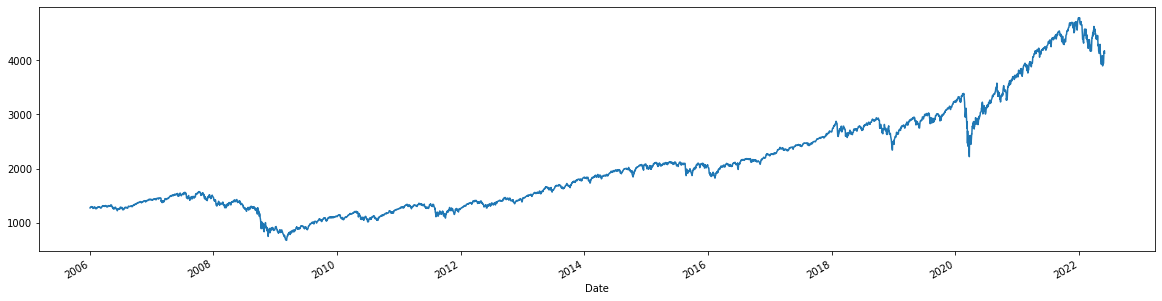

In [3]:
plt.rcParams["figure.figsize"] = (20, 5)

data = d.fetch("data/future/daily", "ES.csv")
data = data[np.datetime64("2006-01-01") :]
data["Close"].plot.line()

# Triple Barrier

In [4]:
resampled = data.resample("M")
target = np.mean((resampled["Close"].last() / resampled["Close"].first()).std()) * 2
price_target = 1
stop_loss = 1
vertical_barrier = np.timedelta64(6, "M")

target

0.09271355870977471

<AxesSubplot:xlabel='Date'>

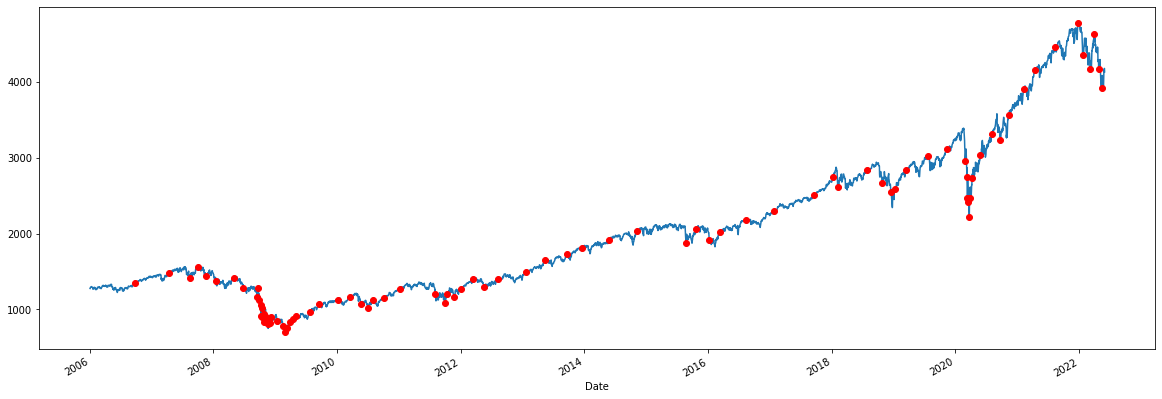

In [5]:
cusum_indices = signals.get_cusum_indices_on_pct_returns(data["Close"], target)

plt.rcParams["figure.figsize"] = (20, 7)

data["Close"].plot.line()
(data["Close"] * cusum_indices).replace(0, np.nan).plot(style="o", color="r")

In [6]:
indices = data.index[cusum_indices]

In [7]:
barriers = signals.get_price_target_stop_loss_indices(
    data,
    indices,
    target=target,
    side=np.random.choice([c.Dir.B, c.Dir.S], len(indices)),
    price_target=price_target,
    stop_loss=stop_loss,
    vertical_barrier=vertical_barrier,
)
barriers = signals.add_profit_target_stop_loss_outcome(barriers)

In [8]:
last = barriers.index[0]
plot_indices = [last]
for i in barriers.index:
    if last + vertical_barrier < i:
        plot_indices.append(i)
        last = i
barriers.loc[plot_indices].head(10)

,pt_dt,sl_dt,side,vb,pt_sl,pt
2006-09-26,NaT,NaT,-1,182 days 14:54:36,0,False
2007-04-16,NaT,NaT,-1,182 days 14:54:36,0,False
2007-11-19,NaT,2008-03-07,1,182 days 14:54:36,-1,False
2008-06-26,2008-09-17,NaT,-1,182 days 14:54:36,1,True
2009-01-14,2009-05-08,2009-02-23,1,182 days 14:54:36,-1,False
2009-07-23,2009-09-16,NaT,1,182 days 14:54:36,1,True
2010-03-16,2010-06-07,NaT,-1,182 days 14:54:36,1,True
2010-10-05,2011-01-03,NaT,1,182 days 14:54:36,1,True
2011-08-04,2011-10-03,2012-01-19,-1,182 days 14:54:36,1,True
2012-03-15,NaT,NaT,-1,182 days 14:54:36,0,False


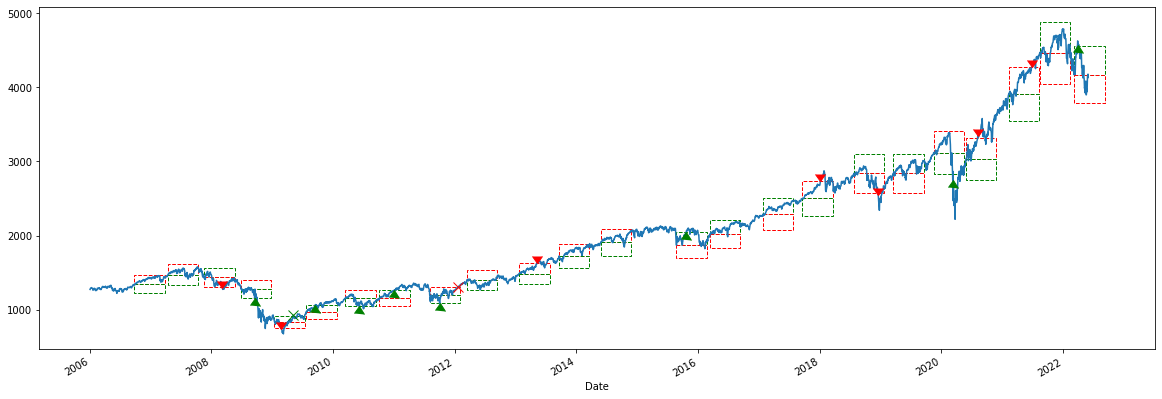

In [9]:
import plt_utils

fig, ax = plt.subplots()
data["Close"].plot.line()

plt_utils.plot_triple_barrier(
    ax,
    data,
    barriers.loc[plot_indices],
    target=target,
    price_target=price_target,
    stop_loss=stop_loss,
    vertical_barrier=vertical_barrier,
)